In [1]:



"""
随机森林算法实现对iris数据集的分类
随机森林主要应用于回归和分类两种场景，又侧重于分类。随机森林是指利用多棵树对样本数据
进行训练、分类并预测的一种方法。它在对数据进行分类的同时，还可以给出各个变量的重要性评分，
评估各个变量在分类中所起的作用。
随机森林的构建：首先利用bootstrap方法有放回地从原始训练集中随机抽取n个样本，并构建n个决策树；
然后假设在训练样本数据中有m个特征，那么每次分裂时选择最好的特征进行分裂，每棵树都一直这样分裂下去，直到该节点
的所有训练样例都属于同一类；接着让每棵决策树在不做任何修剪的前提下最大限度地生长；最后将生成的多棵
分类树组成随机森林，用随机森林分类器对新的数据进行分类与回归。
对于分类问题，按多棵树分类器投票决定最终分类结果；对于回归问题，则由多棵树预测值的均值决定最终预测结果
"""

import  numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris



In [2]:


RF = RandomForestClassifier(n_estimators=100, n_jobs=4, oob_score=True)
iris = load_iris()
x = iris.data[:, :2]
y = iris.target
RF.fit(x, y)
h = .02



In [3]:


cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])



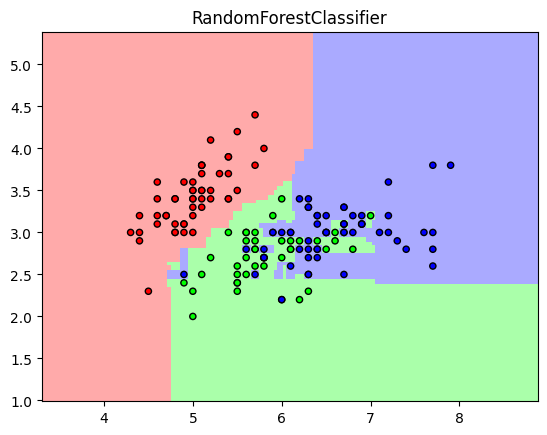

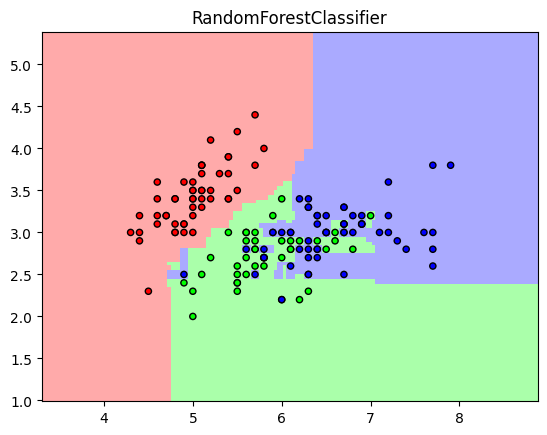

In [4]:


for weight in ['uniform', 'distance']:
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    z = RF.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, z, cmap=cmap_light)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolors='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.title('RandomForestClassifier')



In [5]:


plt.show()
print('RandomForestClassifier:', RF.score(x, y))



RandomForestClassifier: 0.9266666666666666
